# Titanic : Machine Learning From Disaster

In [1]:
from IPython.display import Image
sinking_by_esai8mellows-d4xbme8.jpg")

Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

# I describe below the process that i followed



 1. EXPLORATORY DATA ANALYSIS

   - 1.1 Data Extraction
   
   - 1.2 Overview
  
   - 1.3 Descriptive statistics
  
   - 1.4 Data visualisation
   

 2. Feature Engineering

   - 2.1 Filling missing Values
  
   - 2.2 Binning the categorical features
  
   - 2.3 Creating New Features
   
   - 2.4 Removing irrelevant variables
   
   - 2.4 Creating dummy variables
   
  

 3. Pre-Modeling Tasks


   -  3.1 Defining Features in Training/Test Set
   
   -  3.2 Splitting the dataset
   
   -  3.3 Scaling the dataset
   

 4. Modeling
  
   - Logistic Regression
   - Evaluate the model performance
     
     - Confusion Matrix
     - Accuracy Score
     - Precision Score
     - Recall Score
     - AUC & ROC Curve
     
   - GaussianNB Model
   - Logistic Regression Model
   - Support Vector Machine 
   - KNeighbors Model
   - Decision Tree Model
   - Random Forest Model
   - XGB Classifier
   - Voting Classifier
   
    
 5. Model Tuning using Grid Search
 

 6. Ensemble Modeling

   - Bagging Classifier
   
   - Boosting Classifier
    - Ada Boost Classifier
    - Gradient Boosting classifier
    
   - XGB Classifier
   
   - Extra Trees Classifier
   
   - Gaussian Process NB
   
   - Voting Classifier
   

7. Predictions


- Useful resources
  

# 1 . EXPLORATORY DATA ANALYSIS


##  1.1 Data Extraction

This step it's about installing packages, and the best way is to install the conda distribution that contains them all.
Then, we import the relevant libraries to help us manipulate the data.
Numpy for linear algebra and matrices.
Pandas for data analysis,manipulation tool and data processing
Matplotlib and seaborn for the visualization of the data set.
Sklearn is a collection of machine learning algorithms and predictive modeling

In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


# Data visualization

import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set()


# Pre-Modeling Tasks


from sklearn import preprocessing

from sklearn.preprocessing import OneHotEncoder

from sklearn.preprocessing import StandardScaler    # to scaling our data 

from sklearn.model_selection import train_test_split  #to create validation data set

from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.model_selection import StratifiedKFold

from sklearn.model_selection import learning_curve




 # Measure of Performance
    
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import mean_squared_error





# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/gender_submission.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/train.csv


## 1.2 Viewing Data Set

In this step we start by loading our data and the data set has split into two groups:

-Training set: (train_csv) ; includes our variable target(dependent variable),passenger survival along with other features (Sex, Age, Parch,Sibsp, fare, cabin, Ticket)

-Test et( test_csv);  should be used to see how well our model performs on unseen data. When we say unseen data, we mean that the algorithm or machine learning models have no relation to the test data. We do not want to use any part of the test data in any way to modify our algorithms; Which are the reasons why we clean our test data and train data separately

In [3]:
# lets load the data set

train = pd.read_csv("../input/titanic/train.csv")
test  = pd.read_csv("../input/titanic/test.csv")



In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)


-PassengerId is the unique id of the row and it doesn't have any effect on target

-Survived is the target variable we are trying to predict (0 or 1):
1 = Survived
0 = Not Survived

-Pclass (Passenger Class) is the socio-economic status of the passenger and it is a categorical ordinal feature which has 3 unique values (1, 2 or 3):
1 = Upper Class
2 = Middle Class
3 = Lower Class

-Name, Sex and Age are self-explanatory.

-SibSp is the total number of the passengers' siblings and spouse.

-Parch is the total number of the passengers' parents and children.

-Ticket is the ticket number of the passenger.

-Fare is the passenger fare.

-Cabin is the cabin number of the passenger.

-Embarked is port of embarkation and it is a categorical feature which has 3 unique values (C, Q or S):
C = Cherbourg
Q = Queenstown
S = Southampton

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.shape

(891, 12)

In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
test.shape

(418, 11)

## 1.3 Descriptive Statistics

The next step we'll do some descriptive statistics, this one helps us to describe and understand the features of a specific data by giving short 

summaries about the sample and measures of the data 


In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


##### Checking for the correlation

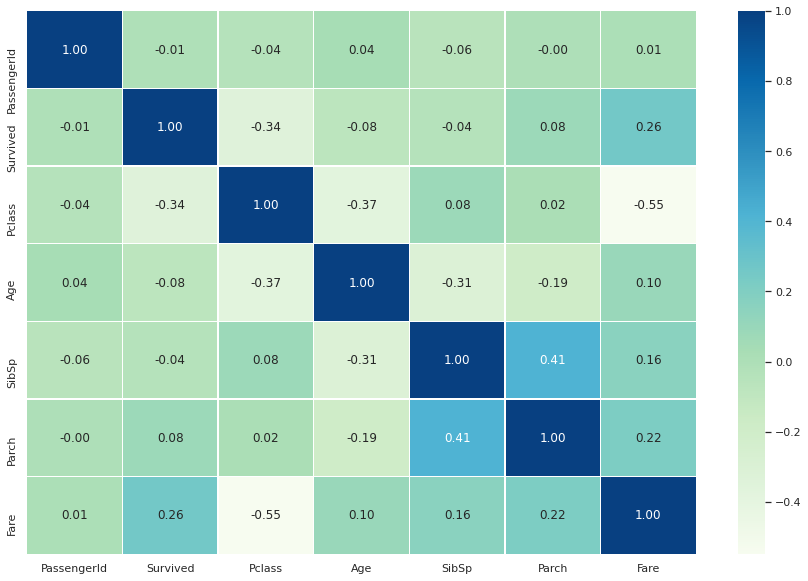

In [11]:
# Correlation Map

# Display the negative and postive correlation between variables

train.corr
f,ax = plt.subplots(figsize=(15,10))
sns.heatmap(train.corr(), annot =True, linewidth =".5", fmt =".2f", cmap='GnBu')
plt.show()



#figsize - image size
#data.corr() - Display positive and negative correlation between columns
#annot=True -shows correlation rates
#linewidths - determines the thickness of the lines in between
#cmap - determines the color tones we will use
#fmt - determines precision(Number of digits after 0)
#if the correlation between the two columns is close to 1 or 1, the correlation between the two columns has a positive ratio.
#if the correlation between the two columns is close to -1 or -1, the correlation between the two columns has a negative ratio.
#If it is close to 0 or 0 there is no relationship between them.

## 1.4 Data Visualization

### - Survived feature

Distribution of survivals : 1 is for survival and 0 is for not

In [12]:
train["Survived"].value_counts()

0    549
1    342
Name: Survived, dtype: int64

## - Sex feature vs Survived feature

Percentage of females who survived : 74.20382165605095
Percentage of males who survived : 18.890814558058924


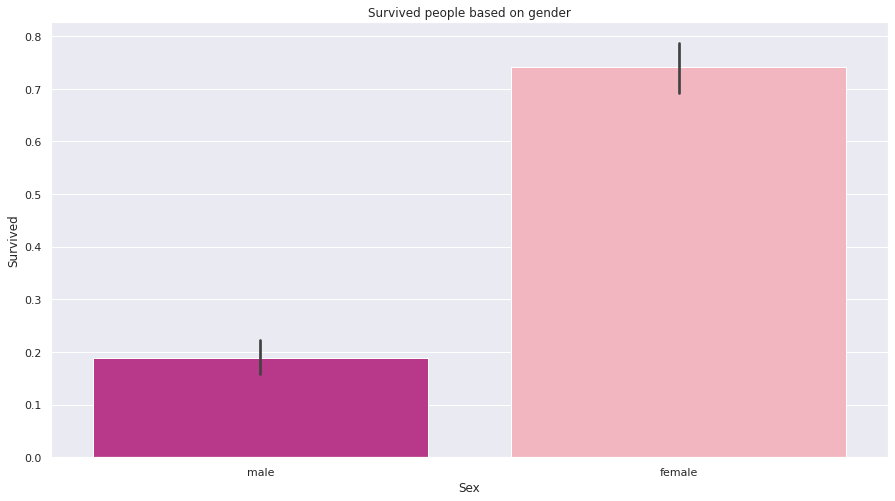

In [13]:
# BarPlot

# Set the width and the height of the figure
plt.figure(figsize=(15,8))

# Add the title
plt.title("Survived people based on gender")

# Draw a barplot of survival people by sex
sns.barplot(x="Sex",y="Survived", data =train,palette=('RdPu_r'))

# Print percentage of males vs females that are survived 
print("Percentage of females who survived :",  train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)
print ("Percentage of males who survived :",  train["Survived"][train["Sex"]==  'male'].value_counts(normalize= True)[1]*100)

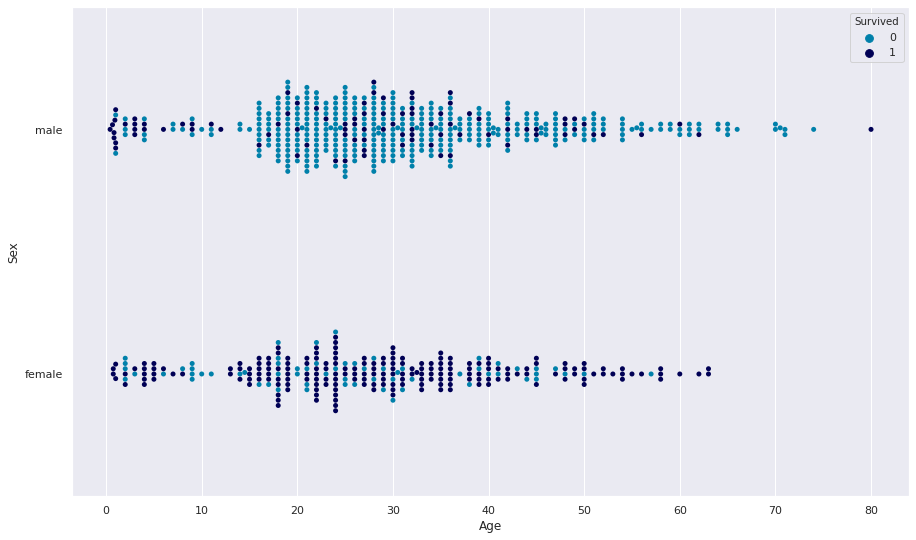

In [14]:
# swarmplot

plt.figure(figsize=(15,9))

sns.swarmplot(x=train['Age'], y=train['Sex'], hue='Survived', data =train, palette= 'ocean_r')

According to this graph, we can notice that womens are more likely to survive

## - PARCH feature vs Survived feature

<function matplotlib.pyplot.show(*args, **kw)>

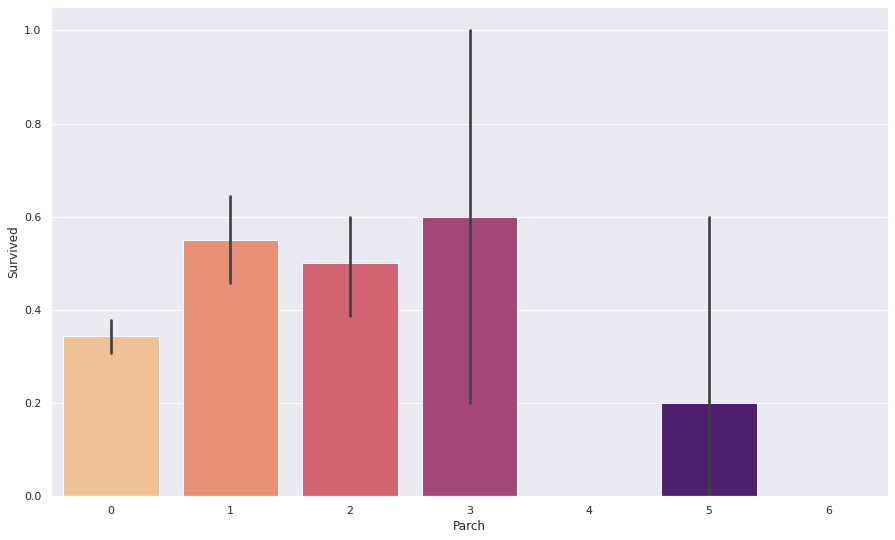

In [15]:
# Barplot

# Set the width and the height of the figure
plt.figure(figsize=(15,9))
sns.barplot(x="Parch", y="Survived", data = train, palette='magma_r')
plt.show

People with less than four parents or childrens aboard more likely to survive

## - SibSp Feature 

<function matplotlib.pyplot.show(*args, **kw)>

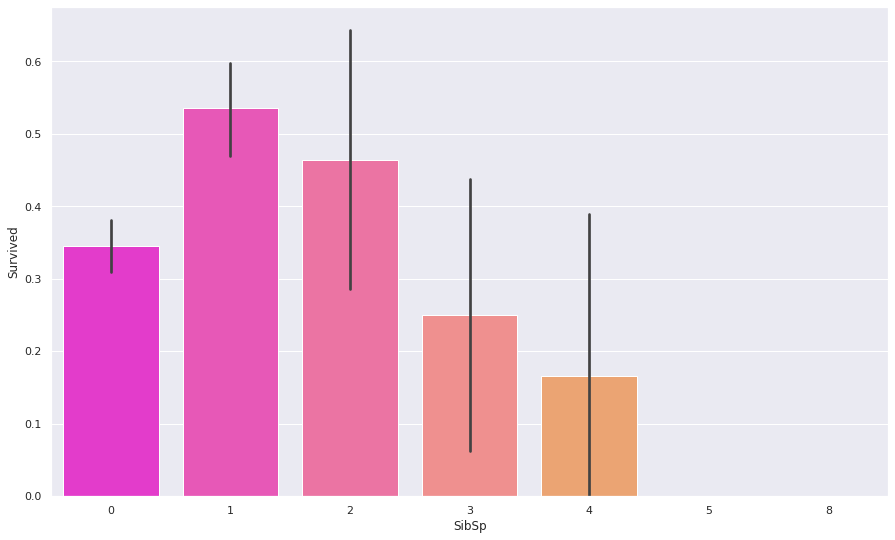

In [16]:
# Barplot

plt.figure(figsize=(15,9))
sns.barplot(x="SibSp", y="Survived", data=train, palette='spring')
plt.show

People with SibSp or spouses were less likely to survive, therefore people with no children were more less likely to survived than those with one children or two.

## - Embarked and fare features

Let's now see how the embarkation site affects the survival.

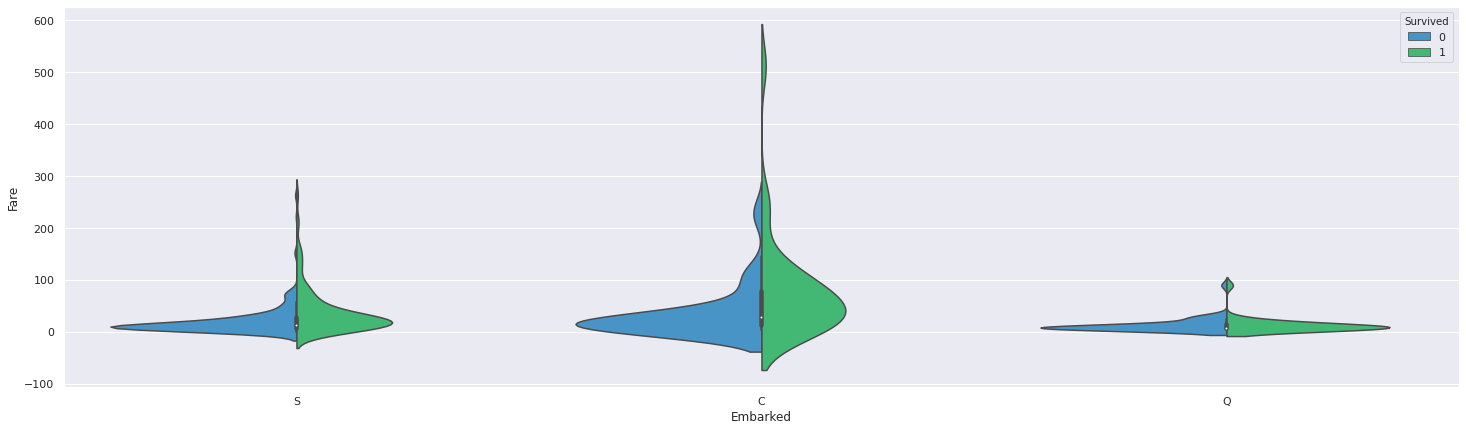

In [17]:
# Violinplot

fig = plt.figure(figsize=(25, 7))
sns.violinplot(x ="Embarked", y ="Fare", hue ="Survived", data=train, split =True , palette = {0: "#3498db", 1:"#2ecc71"});

## - Passenger Class

To look at the correlation between passenger class and survival statistics I would plot a countplot.

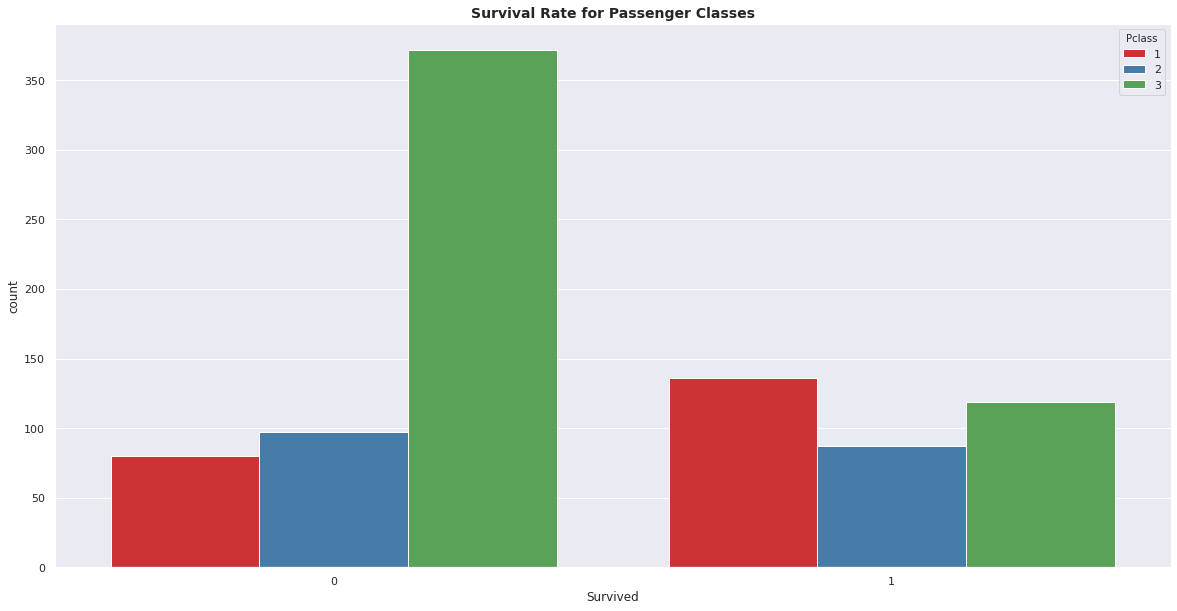

In [18]:
# Subplot

fig, ax = plt.subplots(figsize = (20,10))
ax = sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'Set1')
ax.set_xlabel('Survived')
ax.set_title('Survival Rate for Passenger Classes', fontsize = 14, fontweight='bold');